<a href="https://colab.research.google.com/github/ilman79/ProjectDashboard/blob/main/cleaning_data_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deskripsi Data

Dataset ini berisi data jumlah usaha mikro, kecil, dan menengah (umkm) binaan berdasarkan jenis usaha di Provinsi Jawa Barat dari tahun 2019 s.d. 2021.

Dataset terkait topik Ekonomi ini dihasilkan oleh Dinas Koperasi dan Usaha Kecil yang dikeluarkan dalam periode 1 tahun sekali

Penjelasan mengenai variabel di dalam dataset ini:

- kode_provinsi: menyatakan kode Provinsi Jawa Barat sesuai ketentuan BPS merujuk pada aturan Peraturan Badan Pusat Statistik Nomor 3 Tahun 2019 dengan tipe data numerik.
- nama_provinsi: menyatakan lingkup data berasal dari wilayah Provinsi Jawa Barat sesuai ketentuan BPS merujuk pada aturan Peraturan Badan Pusat Statistik Nomor 3 Tahun 2019 dengan tipe data teks.
- kode_kabupaten_kota: menyatakan kode dari setiap kabupaten dan kota di Provinsi Jawa Barat sesuai ketentuan BPS merujuk pada aturan Peraturan Badan Pusat Statistik Nomor 3 Tahun 2019 dengan tipe data numerik.
- nama_kabupaten_kota: menyatakan lingkup data berasal dari setiap kabupaten dan kota di Provinsi Jawa Barat sesuai penamaan BPS merujuk pada aturan Peraturan Badan Pusat Statistik Nomor 3 Tahun 2019 dengan tipe data teks.
- jenis_usaha: menyatakan kategori jenis usaha dari umkm binaan dengan tipe data teks
- jumlah_umkm: menyatakan proyeksi jumlah usaha mikro kecil menengah (umkm) dengan tipe data numerik.
- satuan: menyatakan satuan dari pengukuran jumlah usaha mikro kecil menengah (umkm) dalam unit dengan tipe data teks.
- tahun: menyatakan tahun produksi data dengan tipe data numerik.

informasi data yang kita gunakan : https://opendata.jabarprov.go.id/id/dataset/jumlah-usaha-mikro-kecil-dan-menengah-umkm-binaan-berdasarkan-jenis-usaha-di-jawa-barat

atau gunakan link repositori : https://github.com/ilman79/ProjectDashboard

#Import Data dan Libarary

In [ ]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd # Loading Module yang dibutuhkan
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading Data Untuk Latihan


file_ = 'data/diskuk-od_17367_jml_ush_mikro_kecil_menengah_umkm_binaan__jenis_ush_data.csv'
try: # Running Locally, yakinkan "file_" berada di folder "data"
    df = pd.read_csv(file_)
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/ilman79/ProjectDashboard/main/diskuk-od_17367_jml_ush_mikro_kecil_menengah_umkm_binaan__jenis_ush_data.csv
    df = pd.read_csv(file_)

N, P = df.shape # Ukuran Data
print('baris = ', N, ', Kolom (jumlah variabel) = ', P)
df.head()

baris =  1215 , Kolom (jumlah variabel) =  9


,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_usaha,jumlah_umkm,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,AGRIBISNIS,9,UNIT,2019
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,AKSESORIS,0,UNIT,2019
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,BATIK,0,UNIT,2019
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,BORDIR,0,UNIT,2019
4,5,32,JAWA BARAT,3201,KABUPATEN BOGOR,CRAFT,30,UNIT,2019


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   1215 non-null   int64 
 1   kode_provinsi        1215 non-null   int64 
 2   nama_provinsi        1215 non-null   object
 3   kode_kabupaten_kota  1215 non-null   int64 
 4   nama_kabupaten_kota  1215 non-null   object
 5   jenis_usaha          1215 non-null   object
 6   jumlah_umkm          1215 non-null   int64 
 7   satuan               1215 non-null   object
 8   tahun                1215 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 85.6+ KB


In [ ]:
varObjects = df.select_dtypes(include = ['object'])
varObjects.head()

,nama_provinsi,nama_kabupaten_kota,jenis_usaha,satuan
0,JAWA BARAT,KABUPATEN BOGOR,AGRIBISNIS,UNIT
1,JAWA BARAT,KABUPATEN BOGOR,AKSESORIS,UNIT
2,JAWA BARAT,KABUPATEN BOGOR,BATIK,UNIT
3,JAWA BARAT,KABUPATEN BOGOR,BORDIR,UNIT
4,JAWA BARAT,KABUPATEN BOGOR,CRAFT,UNIT


In [ ]:
for col in varObjects.columns:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   1215 non-null   int64   
 1   kode_provinsi        1215 non-null   int64   
 2   nama_provinsi        1215 non-null   category
 3   kode_kabupaten_kota  1215 non-null   int64   
 4   nama_kabupaten_kota  1215 non-null   category
 5   jenis_usaha          1215 non-null   category
 6   jumlah_umkm          1215 non-null   int64   
 7   satuan               1215 non-null   category
 8   tahun                1215 non-null   int64   
dtypes: category(4), int64(5)
memory usage: 54.5 KB


In [ ]:
df['tahun'] = pd.to_datetime(df['tahun'], format='%Y').dt.year

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   id                   1215 non-null   int64   
 1   kode_provinsi        1215 non-null   int64   
 2   nama_provinsi        1215 non-null   category
 3   kode_kabupaten_kota  1215 non-null   int64   
 4   nama_kabupaten_kota  1215 non-null   category
 5   jenis_usaha          1215 non-null   category
 6   jumlah_umkm          1215 non-null   int64   
 7   satuan               1215 non-null   category
 8   tahun                1215 non-null   int32   
dtypes: category(4), int32(1), int64(4)
memory usage: 49.7 KB


In [ ]:
df.describe(include='all')

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_usaha,jumlah_umkm,satuan,tahun
count,1215.000000,1215.0,1215,1215.000000,1215,1215,1215.000000,1215,1215.000000
unique,NaN,NaN,1,NaN,27,15,NaN,1,NaN
top,NaN,NaN,JAWA BARAT,NaN,KABUPATEN BANDUNG,AGRIBISNIS,NaN,UNIT,NaN
freq,NaN,NaN,1215,NaN,45,81,NaN,1215,NaN
mean,608.000000,32.0,NaN,3231.333333,NaN,NaN,9.548148,NaN,2020.000000
std,350.884596,0.0,NaN,31.214700,NaN,NaN,20.683959,NaN,0.816833
min,1.000000,32.0,NaN,3201.000000,NaN,NaN,0.000000,NaN,2019.000000
25%,304.500000,32.0,NaN,3207.000000,NaN,NaN,0.000000,NaN,2019.000000
50%,608.000000,32.0,NaN,3214.000000,NaN,NaN,1.000000,NaN,2020.000000
75%,911.500000,32.0,NaN,3273.000000,NaN,NaN,9.000000,NaN,2021.000000


In [ ]:
# get all unique values of a variable/column
catVar = df.select_dtypes(include = ['category'])

for col in catVar.columns:
    print(col,': ', set(df[col].unique()))

nama_provinsi :  {'JAWA BARAT'}
nama_kabupaten_kota :  {'KABUPATEN TASIKMALAYA', 'KOTA BANJAR', 'KABUPATEN GARUT', 'KABUPATEN INDRAMAYU', 'KABUPATEN KARAWANG', 'KOTA CIMAHI', 'KABUPATEN BOGOR', 'KABUPATEN SUMEDANG', 'KABUPATEN SUBANG', 'KABUPATEN CIAMIS', 'KOTA DEPOK', 'KOTA BANDUNG', 'KABUPATEN BANDUNG', 'KOTA BEKASI', 'KOTA BOGOR', 'KOTA CIREBON', 'KABUPATEN CIREBON', 'KABUPATEN PANGANDARAN', 'KABUPATEN MAJALENGKA', 'KABUPATEN BANDUNG BARAT', 'KOTA SUKABUMI', 'KABUPATEN BEKASI', 'KABUPATEN KUNINGAN', 'KABUPATEN PURWAKARTA', 'KOTA TASIKMALAYA', 'KABUPATEN CIANJUR', 'KABUPATEN SUKABUMI'}
jenis_usaha :  {'CRAFT', 'MINUMAN', 'INDUSTRI', 'JASA', 'MEBEL', 'KULINER', 'KONVEKSI', 'AGRIBISNIS', 'BORDIR', 'FASHION', 'DEKORASI', 'OBAT-OBATAN', 'MAKANAN', 'AKSESORIS', 'BATIK'}
satuan :  {'UNIT'}


In [ ]:
# mengecek apakah ada duplikat data sangatlah mudah menggunakan Pandas
# Bayangkan jika menggunakan Excel.
print(df.shape)
print("jumlah data yang duplikat", df.duplicated().sum())
df[df.duplicated() == True]
# Perhatikan kalau sebelumnya kita tidak "Drop" var observasi,
# maka kita tidak akan mendapatkan duplikasi dengan cara ini.

(1215, 9)
jumlah data yang duplikat 0


,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_usaha,jumlah_umkm,satuan,tahun


Pisahkan antara daerah yang ada di Kota dan Kabupaten

In [ ]:
df_kota = df[df['nama_kabupaten_kota'].str.contains('Kota', case=False)]
df_kota

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_usaha,jumlah_umkm,satuan,tahun
270,271,32,JAWA BARAT,3271,KOTA BOGOR,AGRIBISNIS,0,UNIT,2019
271,272,32,JAWA BARAT,3271,KOTA BOGOR,AKSESORIS,0,UNIT,2019
272,273,32,JAWA BARAT,3271,KOTA BOGOR,BATIK,2,UNIT,2019
273,274,32,JAWA BARAT,3271,KOTA BOGOR,BORDIR,0,UNIT,2019
274,275,32,JAWA BARAT,3271,KOTA BOGOR,CRAFT,2,UNIT,2019
...,...,...,...,...,...,...,...,...,...
1210,1211,32,JAWA BARAT,3279,KOTA BANJAR,KONVEKSI,0,UNIT,2021
1211,1212,32,JAWA BARAT,3279,KOTA BANJAR,KULINER,4,UNIT,2021
1212,1213,32,JAWA BARAT,3279,KOTA BANJAR,MAKANAN,64,UNIT,2021
1213,1214,32,JAWA BARAT,3279,KOTA BANJAR,MINUMAN,14,UNIT,2021


In [ ]:
df_kota

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_usaha,jumlah_umkm,satuan,tahun
270,271,32,JAWA BARAT,3271,KOTA BOGOR,AGRIBISNIS,0,UNIT,2019
271,272,32,JAWA BARAT,3271,KOTA BOGOR,AKSESORIS,0,UNIT,2019
272,273,32,JAWA BARAT,3271,KOTA BOGOR,BATIK,2,UNIT,2019
273,274,32,JAWA BARAT,3271,KOTA BOGOR,BORDIR,0,UNIT,2019
274,275,32,JAWA BARAT,3271,KOTA BOGOR,CRAFT,2,UNIT,2019
...,...,...,...,...,...,...,...,...,...
1210,1211,32,JAWA BARAT,3279,KOTA BANJAR,KONVEKSI,0,UNIT,2021
1211,1212,32,JAWA BARAT,3279,KOTA BANJAR,KULINER,4,UNIT,2021
1212,1213,32,JAWA BARAT,3279,KOTA BANJAR,MAKANAN,64,UNIT,2021
1213,1214,32,JAWA BARAT,3279,KOTA BANJAR,MINUMAN,14,UNIT,2021


kemudian ubah misal 'KOTA BOGOR' jadi 'Kota Bogor'

In [ ]:
df_kota['nama_kabupaten_kota'] = df_kota['nama_kabupaten_kota'].str.title()
df_kota['nama_kabupaten_kota']

270      Kota Bogor
271      Kota Bogor
272      Kota Bogor
273      Kota Bogor
274      Kota Bogor
           ...     
1210    Kota Banjar
1211    Kota Banjar
1212    Kota Banjar
1213    Kota Banjar
1214    Kota Banjar
Name: nama_kabupaten_kota, Length: 405, dtype: object

Ubah juga pada column jenis usaha agar huruf kapitalnya diawal saja

In [ ]:
df_kota['jenis_usaha'] = df_kota['jenis_usaha'].str.title()
df_kota['jenis_usaha']

270      Agribisnis
271       Aksesoris
272           Batik
273          Bordir
274           Craft
           ...     
1210       Konveksi
1211        Kuliner
1212        Makanan
1213        Minuman
1214    Obat-Obatan
Name: jenis_usaha, Length: 405, dtype: object

Lakukan hal yang sama dengan Kota

In [ ]:
df_kabupaten = df[df['nama_kabupaten_kota'].str.contains('Kabupaten', case=False)]
df_kabupaten

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,jenis_usaha,jumlah_umkm,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,AGRIBISNIS,9,UNIT,2019
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,AKSESORIS,0,UNIT,2019
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,BATIK,0,UNIT,2019
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,BORDIR,0,UNIT,2019
4,5,32,JAWA BARAT,3201,KABUPATEN BOGOR,CRAFT,30,UNIT,2019
...,...,...,...,...,...,...,...,...,...
1075,1076,32,JAWA BARAT,3218,KABUPATEN PANGANDARAN,KONVEKSI,0,UNIT,2021
1076,1077,32,JAWA BARAT,3218,KABUPATEN PANGANDARAN,KULINER,19,UNIT,2021
1077,1078,32,JAWA BARAT,3218,KABUPATEN PANGANDARAN,MAKANAN,50,UNIT,2021
1078,1079,32,JAWA BARAT,3218,KABUPATEN PANGANDARAN,MINUMAN,22,UNIT,2021


Kemudian ubah kata yang ada pada column kabupaten menjadi huruf kapital diawal saja

In [ ]:
df_kabupaten['nama_kabupaten_kota'] = df_kabupaten['nama_kabupaten_kota'].str.title()
df_kabupaten['nama_kabupaten_kota']

0             Kabupaten Bogor
1             Kabupaten Bogor
2             Kabupaten Bogor
3             Kabupaten Bogor
4             Kabupaten Bogor
                ...          
1075    Kabupaten Pangandaran
1076    Kabupaten Pangandaran
1077    Kabupaten Pangandaran
1078    Kabupaten Pangandaran
1079    Kabupaten Pangandaran
Name: nama_kabupaten_kota, Length: 810, dtype: object

In [ ]:
df_kabupaten['jenis_usaha'] = df_kabupaten['jenis_usaha'].str.title()
df_kabupaten['jenis_usaha']

0        Agribisnis
1         Aksesoris
2             Batik
3            Bordir
4             Craft
           ...     
1075       Konveksi
1076        Kuliner
1077        Makanan
1078        Minuman
1079    Obat-Obatan
Name: jenis_usaha, Length: 810, dtype: object

In [ ]:
# import Module yang dibutuhkan untuk Visualisasi
import matplotlib.pyplot as plt, seaborn as sns
plt.style.use('bmh'); sns.color_palette("tab20"); sns.set()

In [ ]:
# Visual Python: Visualization > Seaborn
def vp_seaborn_show_values(axs, precision=1, space=0.01):
    pstr = '{:.' + str(precision) + 'f}'

    def _single(ax):
        # check orient
        orient = 'v'
        if len(ax.patches) == 1:
            # check if 0
            if ax.patches[0].get_x() == 0:
                orient = 'h'
        else:
            # compare 0, 1 patches
            p0 = ax.patches[0]
            p1 = ax.patches[1]
            if p0.get_x() == p1.get_x():
                orient = 'h'

        if orient == 'v':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*space)
                if not np.isnan(_x) and not np.isnan(_y):
                    value = pstr.format(p.get_height())
                    ax.text(_x, _y, value, ha='center')
        elif orient == 'h':
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + (space - 0.01)
                _y = p.get_y() + p.get_height() / 2
                if not np.isnan(_x) and not np.isnan(_y):
                    value = pstr.format(p.get_width())
                    ax.text(_x, _y, value, ha='left')

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

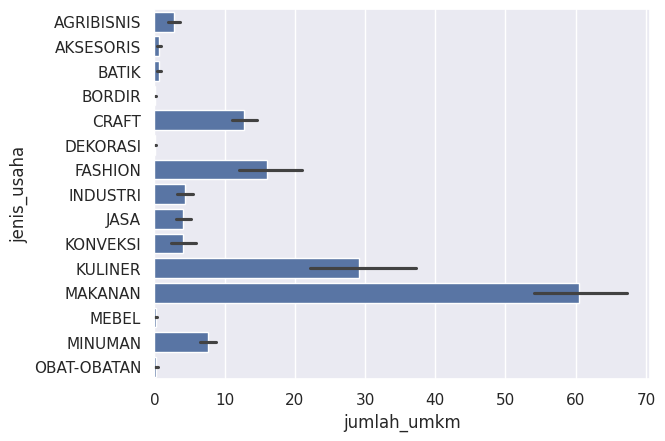

,jumlah_umkm
count,1215.000000
mean,9.548148
std,20.683959
min,0.000000
25%,0.000000
50%,1.000000
75%,9.000000
max,201.000000


In [ ]:
sns.barplot(data=df, y='jenis_usaha', x='jumlah_umkm')
plt.show()

df[['jumlah_umkm']].describe()

In [ ]:
# General Look at the Missing Values
print(df.isnull().sum())

id                     0
kode_provinsi          0
nama_provinsi          0
kode_kabupaten_kota    0
nama_kabupaten_kota    0
jenis_usaha            0
jumlah_umkm            0
satuan                 0
tahun                  0
dtype: int64


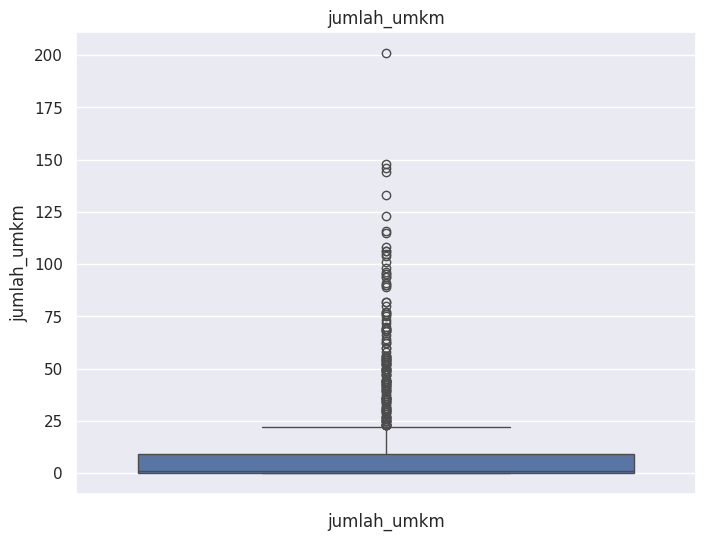

In [ ]:
# Membuat boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['jumlah_umkm'])

# Memberikan judul dan label sumbu
plt.title('jumlah_umkm')
plt.xlabel('jumlah_umkm')

# Menampilkan plot
plt.show()

In [ ]:
kategori = df["nama_kabupaten_kota"].unique()

category_per_city = {
    city : df[df["nama_kabupaten_kota"] == city][["jenis_usaha", "jumlah_umkm"]].groupby("jenis_usaha").sum()["jumlah_umkm"].sort_values(ascending=False) for city in kategori
}

In [ ]:
for city, categories in category_per_city.items():
    print(city)
    print(categories.head(), end="\n\n")

KABUPATEN BOGOR
jenis_usaha
MAKANAN    227
KULINER    103
CRAFT       78
FASHION     63
MINUMAN     37
Name: jumlah_umkm, dtype: int64

KABUPATEN SUKABUMI
jenis_usaha
MAKANAN     186
FASHION      62
CRAFT        59
KULINER      58
INDUSTRI     35
Name: jumlah_umkm, dtype: int64

KABUPATEN CIANJUR
jenis_usaha
MAKANAN    208
KULINER     48
MINUMAN     44
FASHION     43
CRAFT       32
Name: jumlah_umkm, dtype: int64

KABUPATEN BANDUNG
jenis_usaha
MAKANAN     347
FASHION      68
KULINER      59
CRAFT        44
KONVEKSI     44
Name: jumlah_umkm, dtype: int64

KABUPATEN GARUT
jenis_usaha
MAKANAN     202
KULINER      83
FASHION      81
KONVEKSI     33
CRAFT        30
Name: jumlah_umkm, dtype: int64

KABUPATEN TASIKMALAYA
jenis_usaha
MAKANAN     218
KULINER      60
CRAFT        50
KONVEKSI     33
MINUMAN      32
Name: jumlah_umkm, dtype: int64

KABUPATEN CIAMIS
jenis_usaha
MAKANAN    287
KULINER     70
CRAFT       18
MINUMAN     16
FASHION     11
Name: jumlah_umkm, dtype: int64

KABUPATEN KUNI

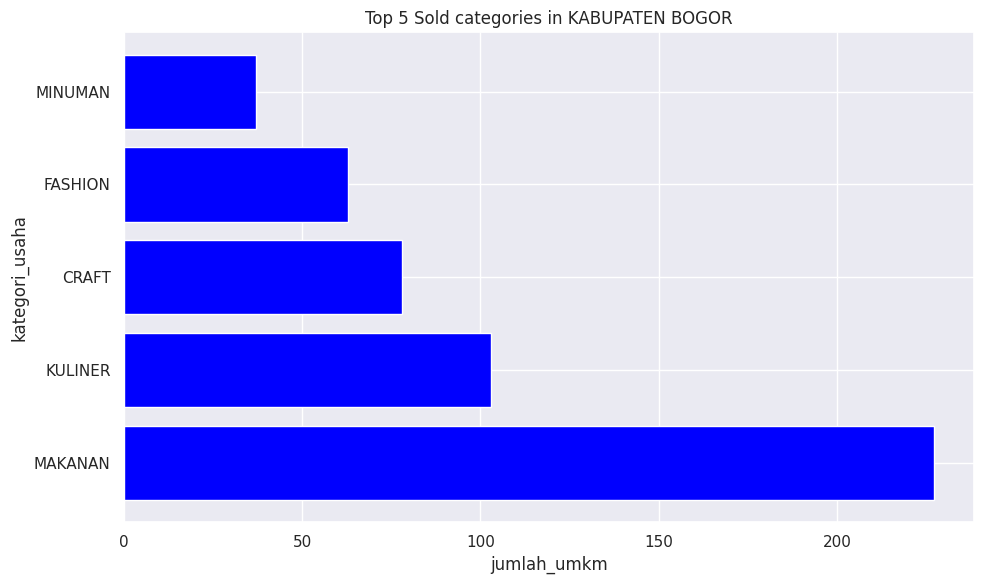

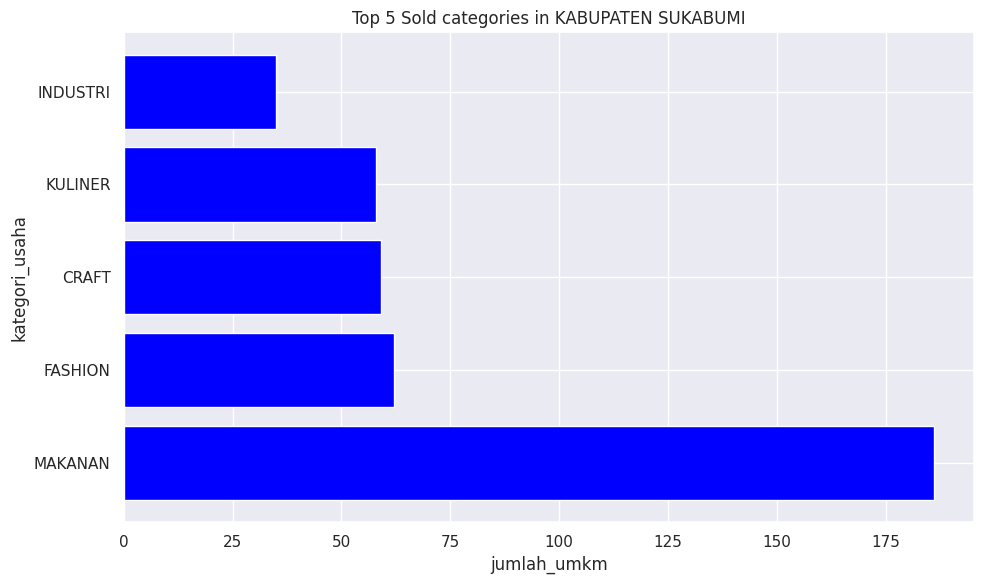

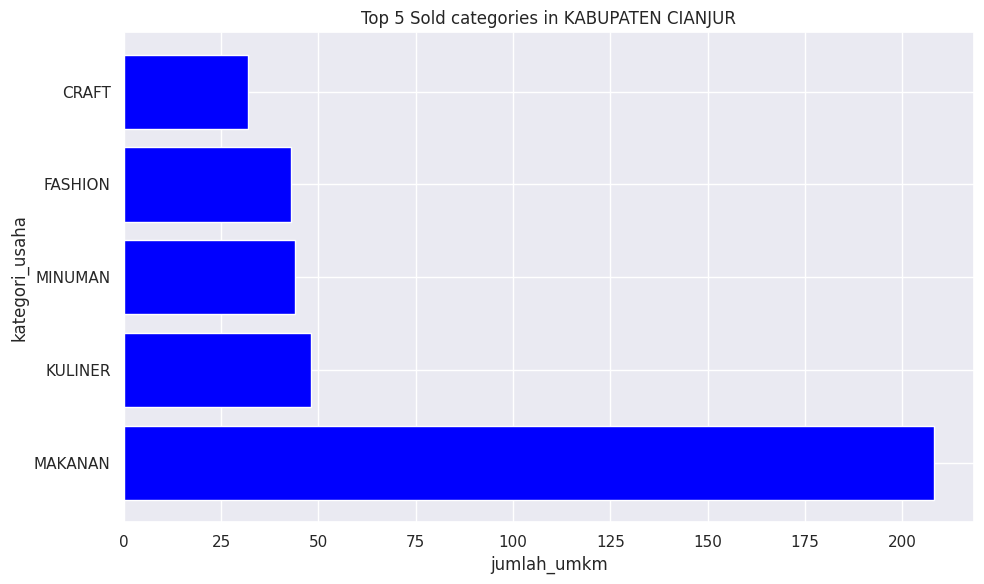

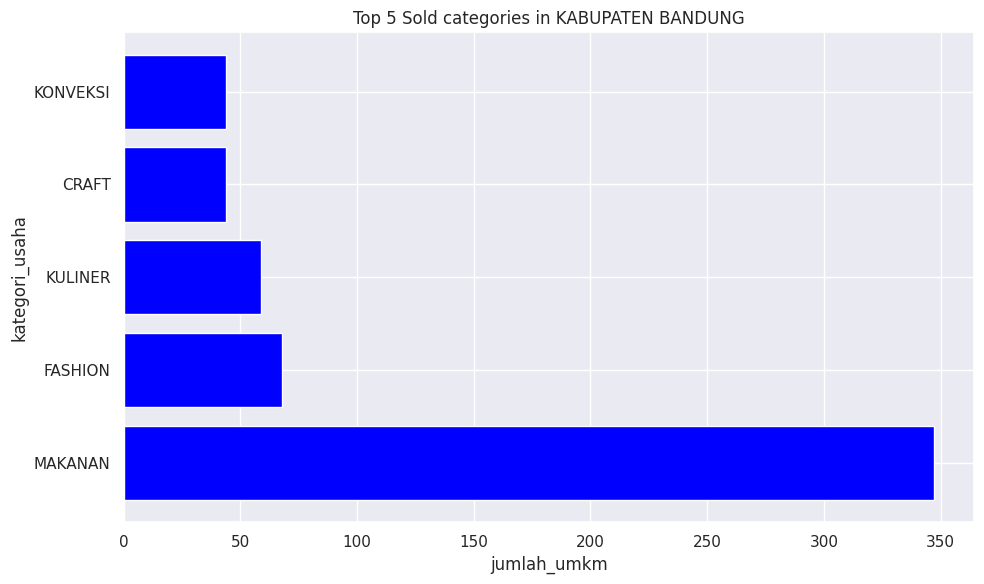

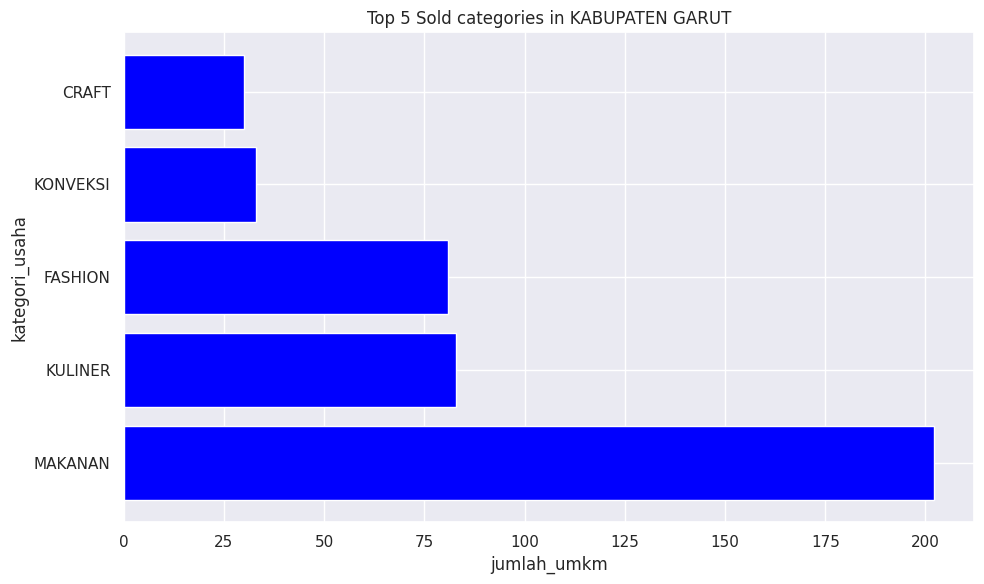

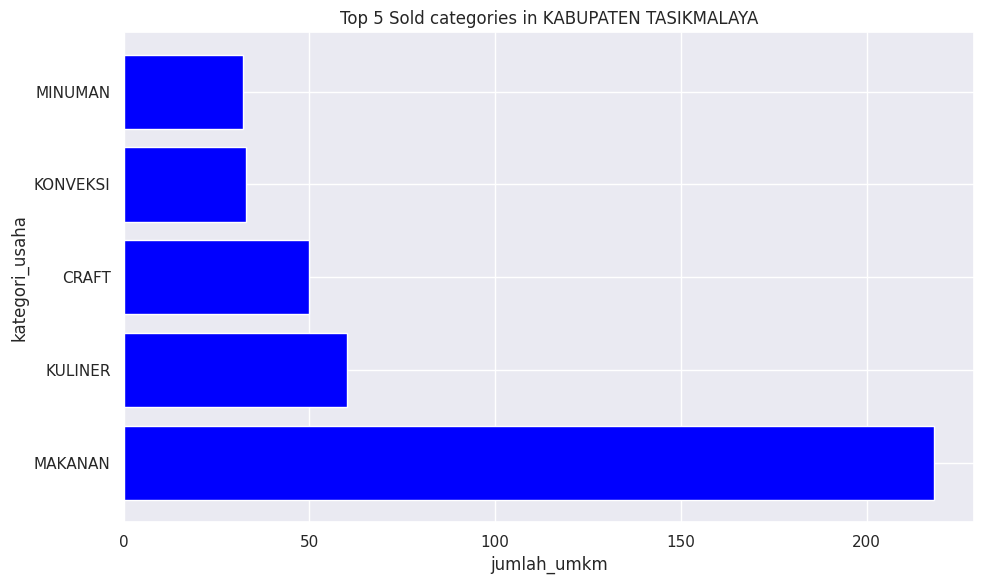

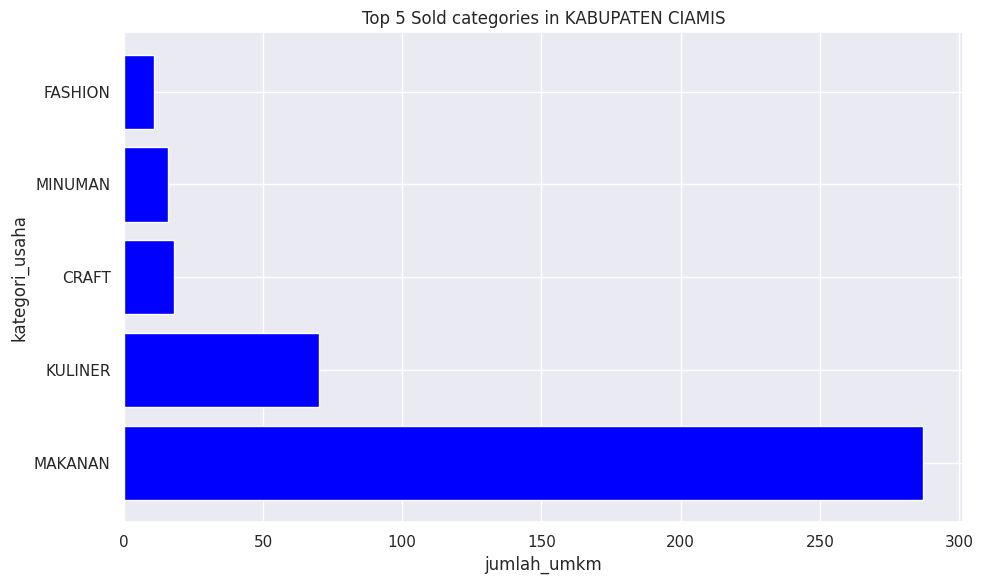

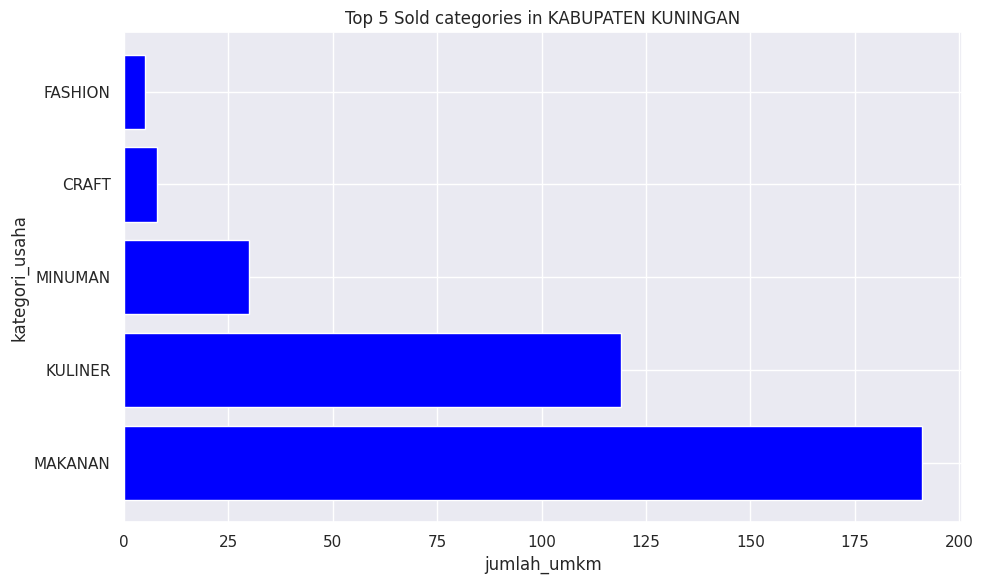

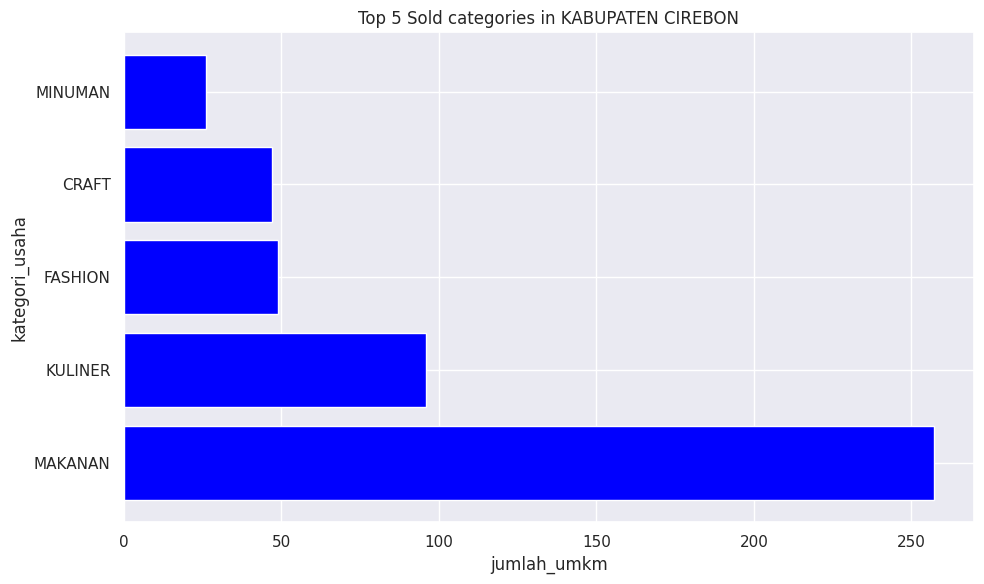

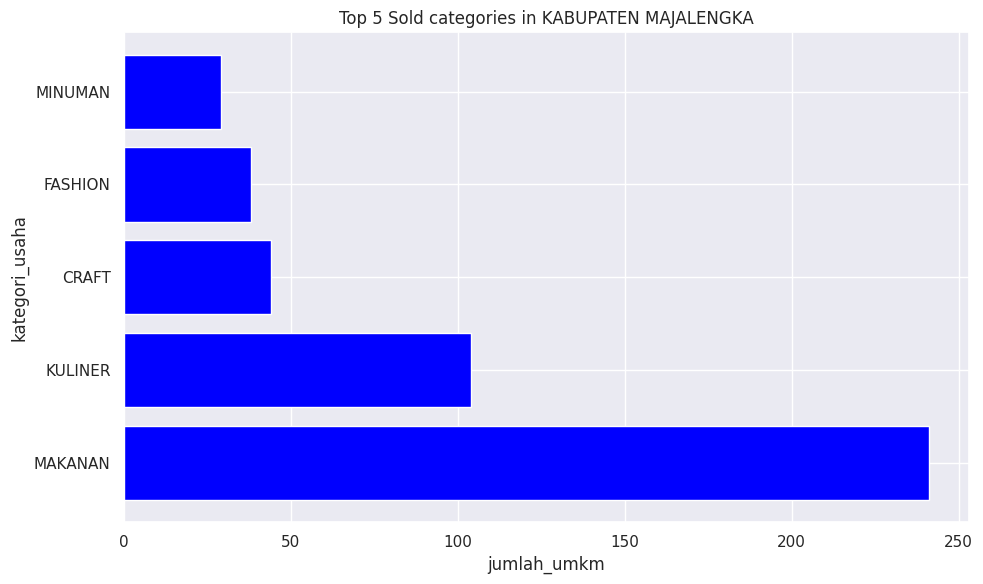

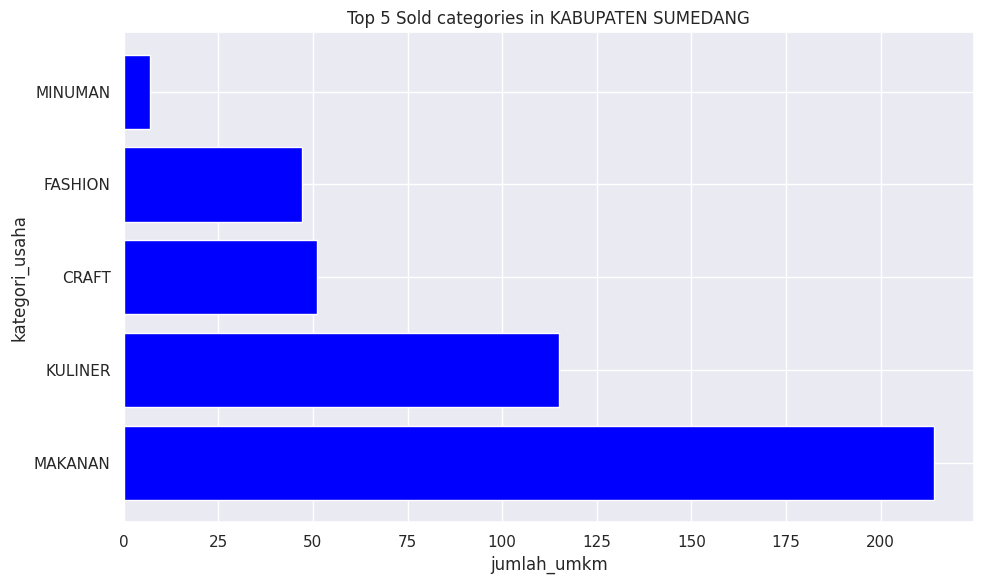

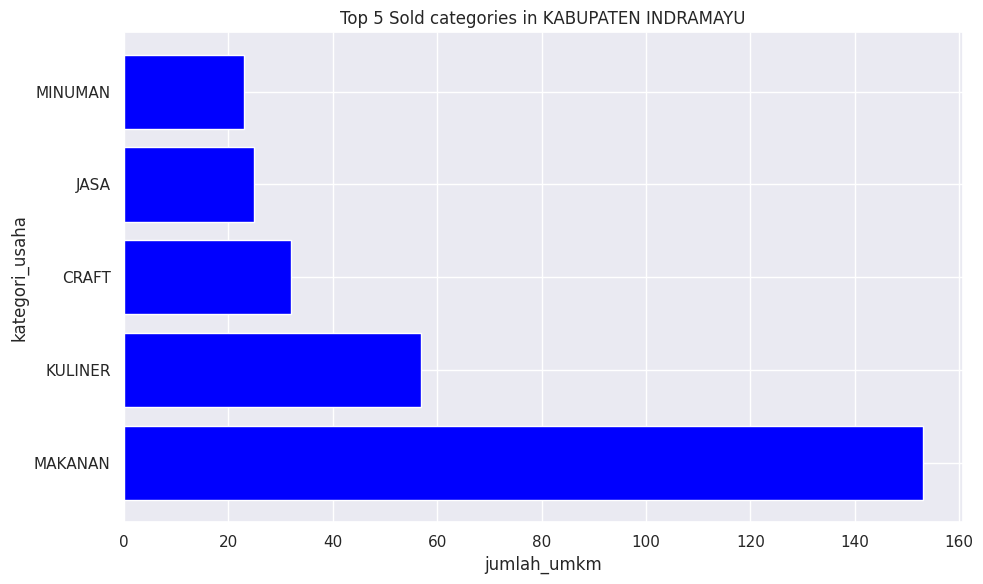

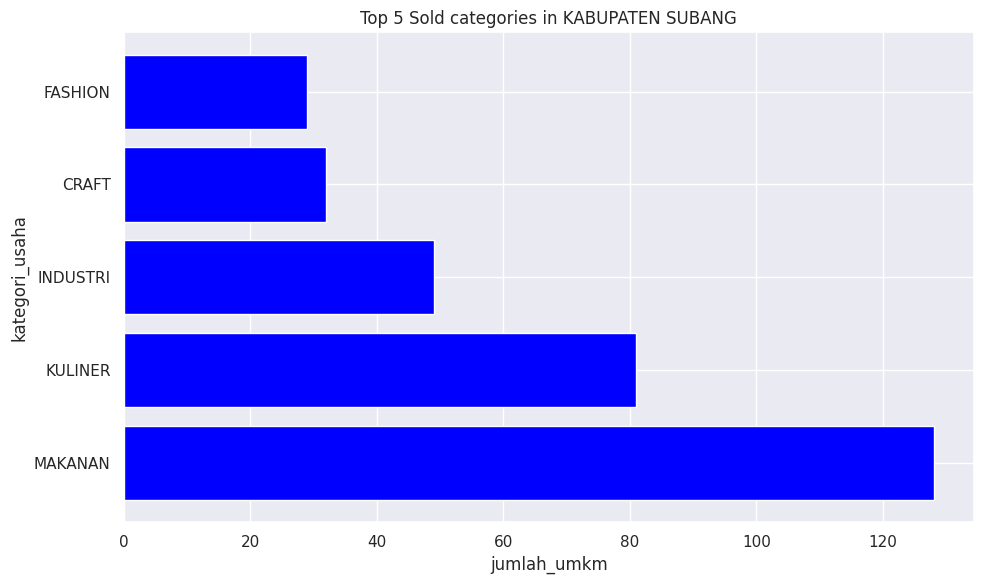

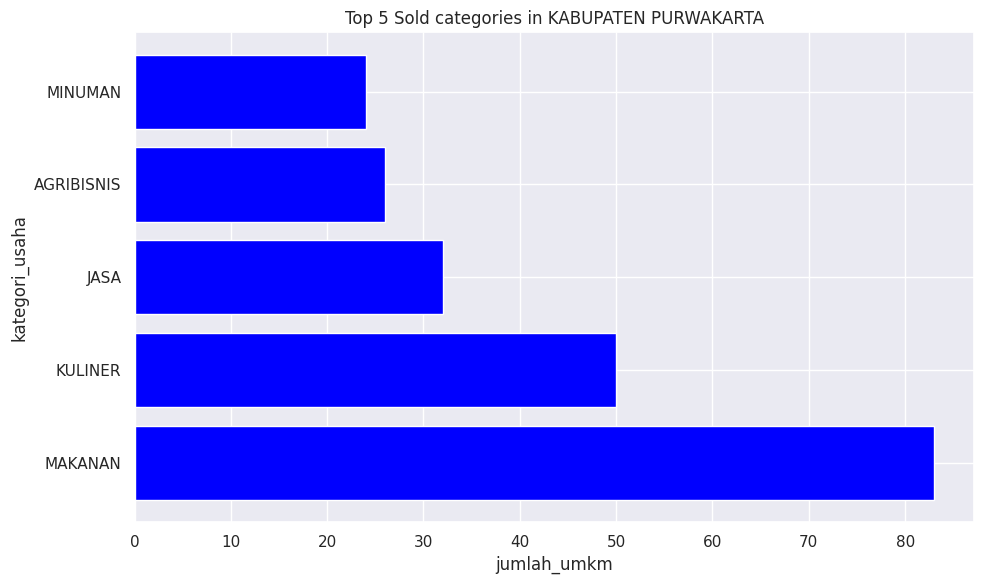

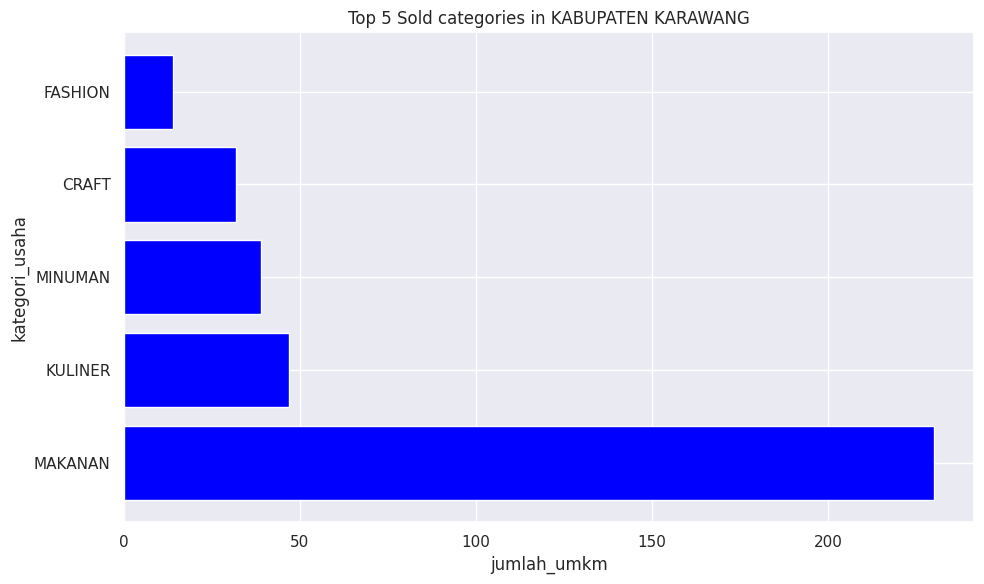

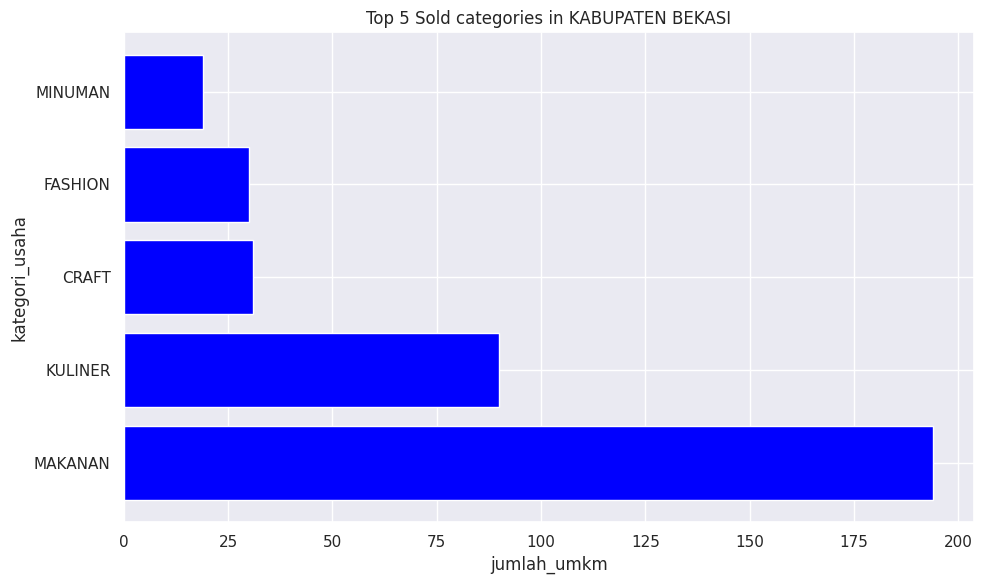

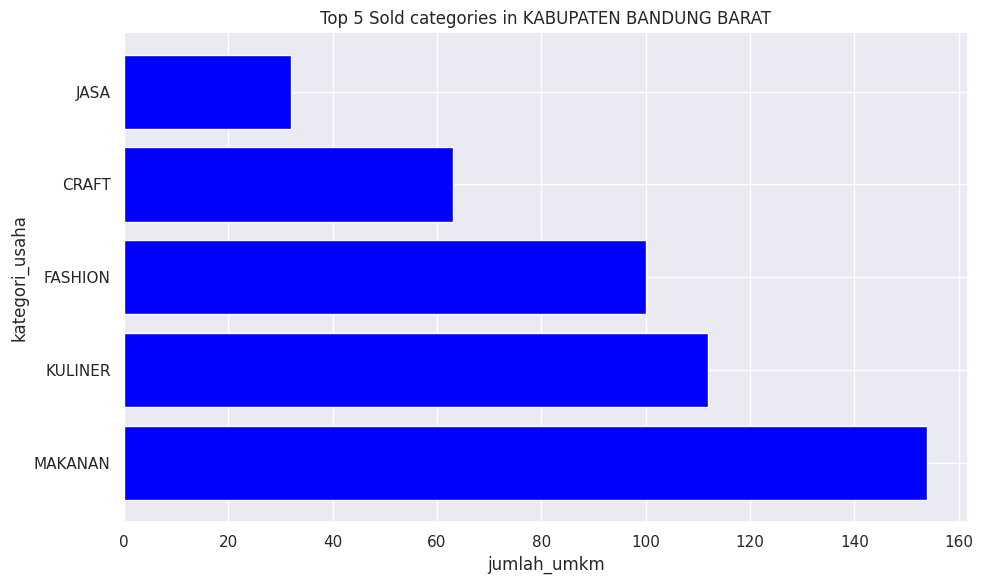

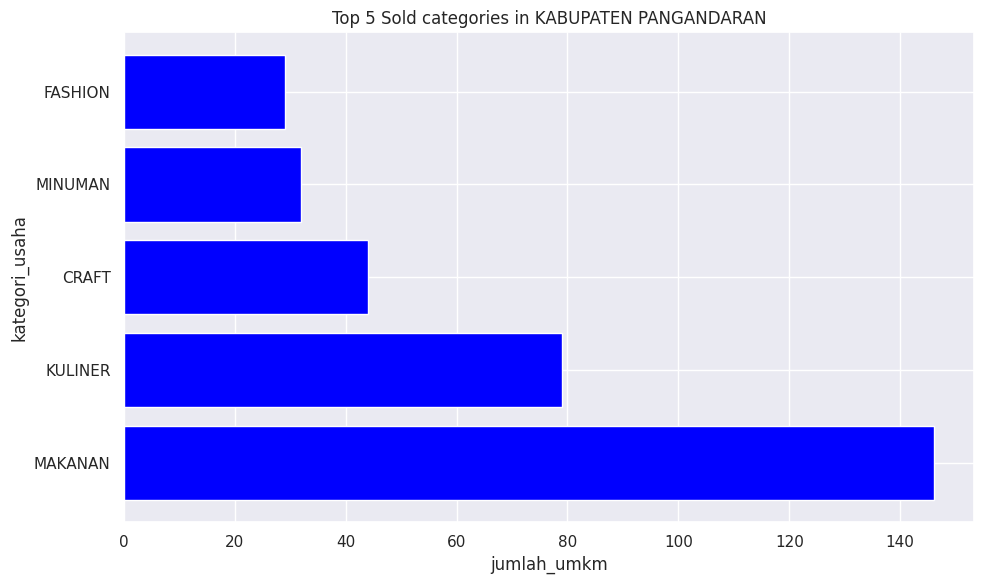

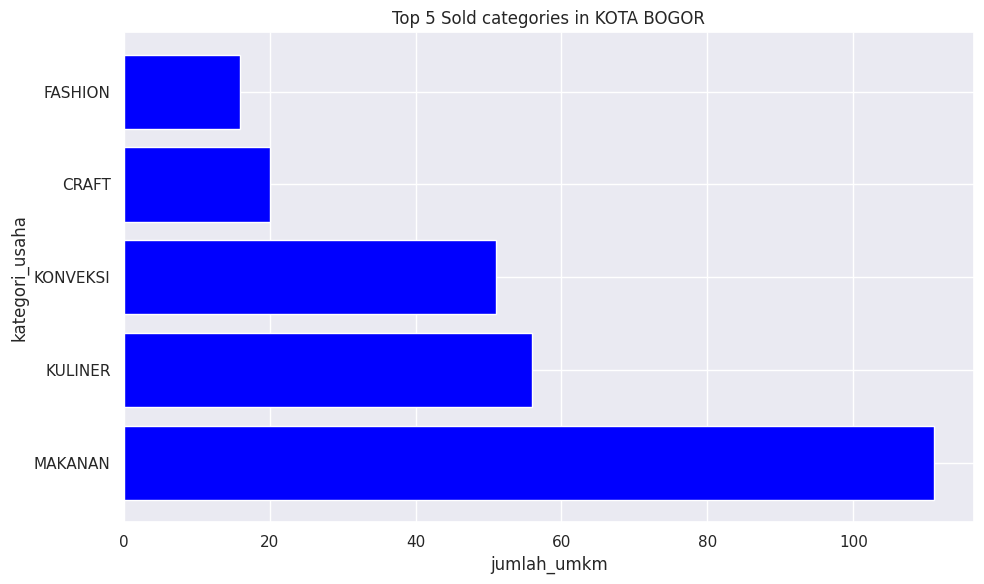

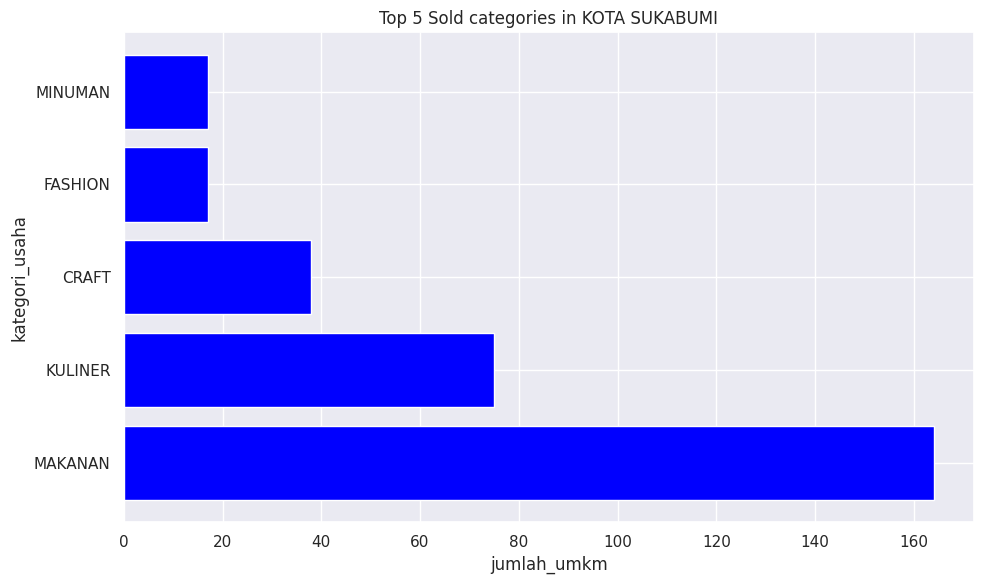

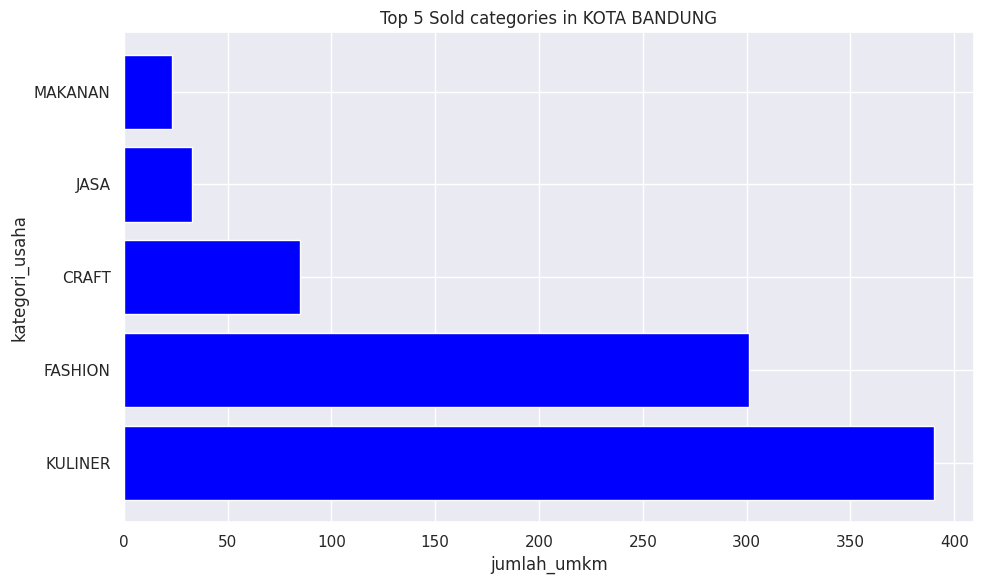

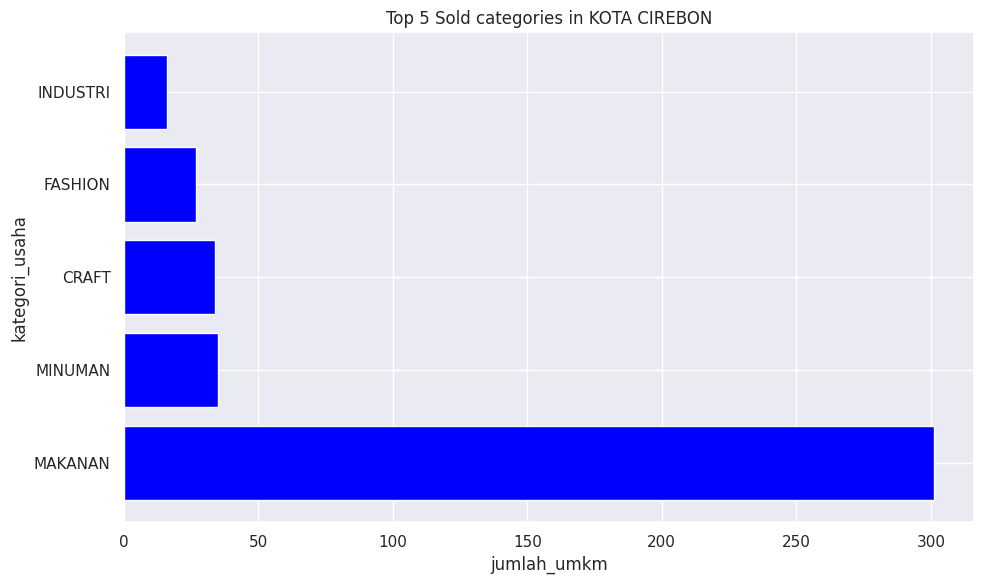

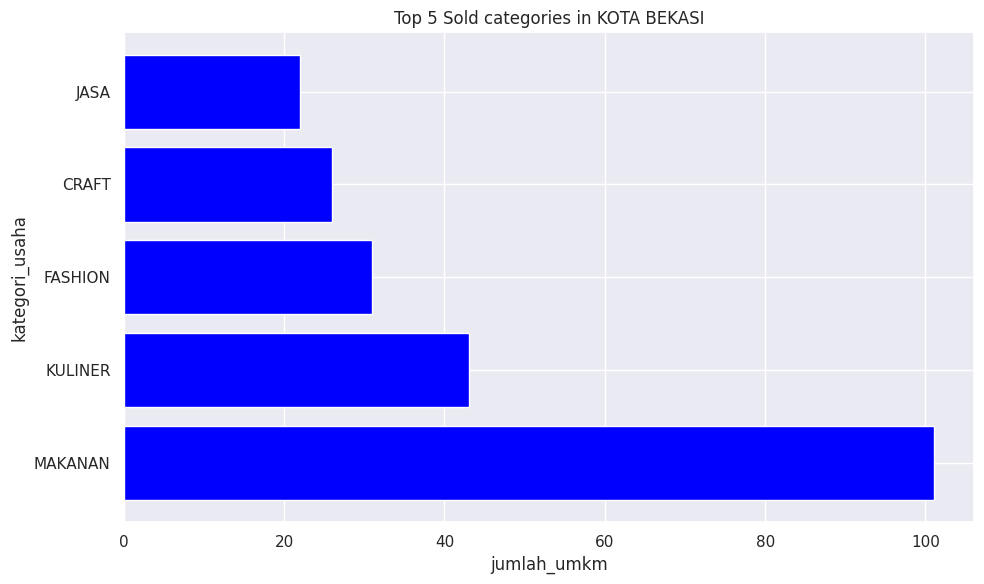

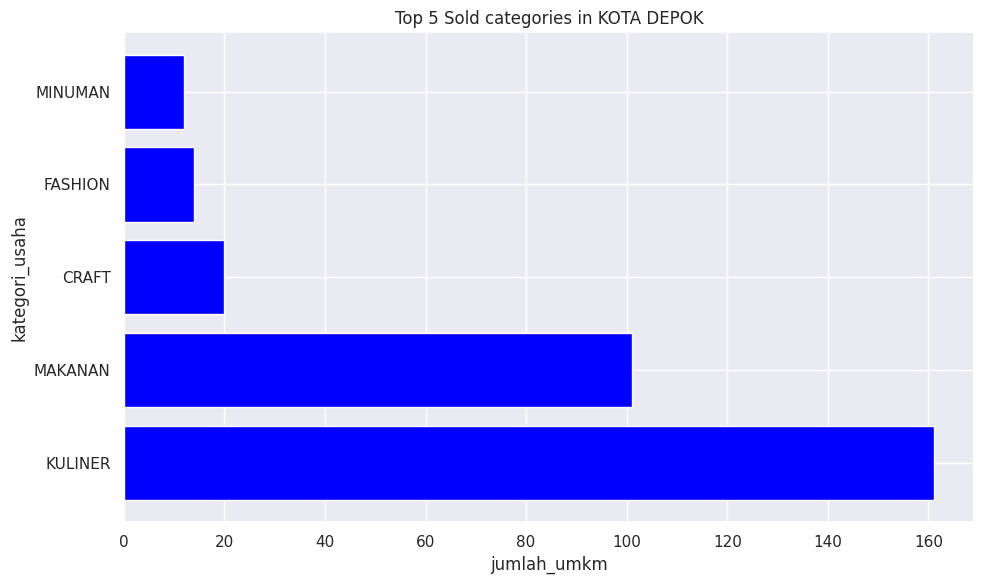

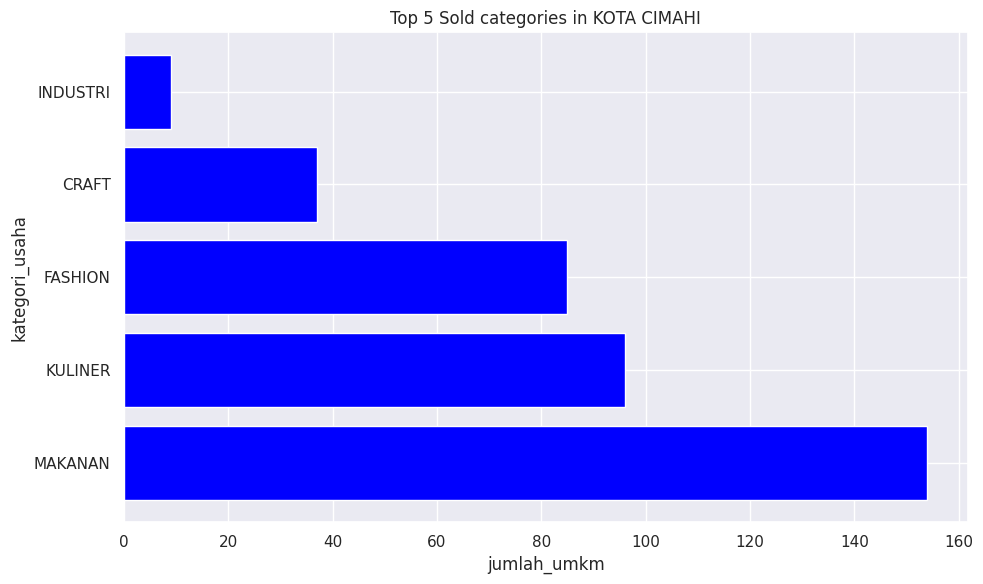

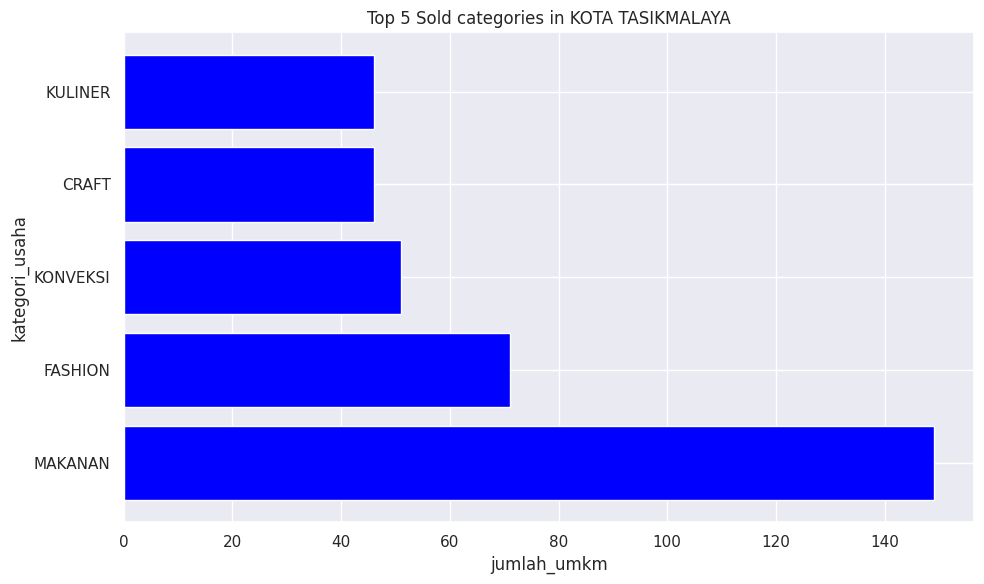

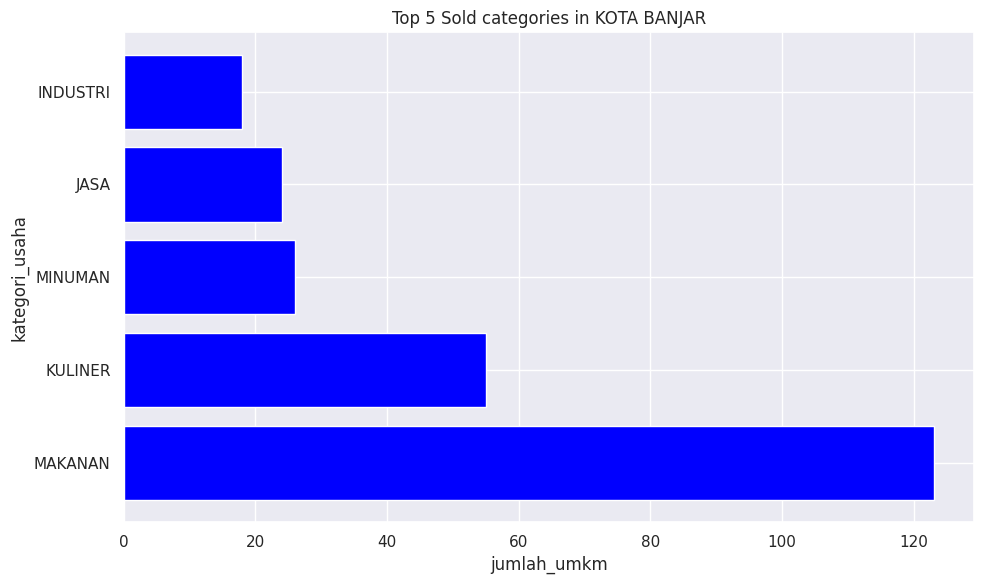

In [ ]:
# Loop melalui setiap kota dan kategori
for city, categories in category_per_city.items():
    # Membuat subplot untuk setiap kota
    plt.figure(figsize=(10, 6))
    plt.barh(categories.head().index, categories.head(), color='blue')

    # Menambahkan judul dan label sumbu
    plt.title(f'Top 5 Sold categories in {city}')
    plt.xlabel('jumlah_umkm')
    plt.ylabel('kategori_usaha')

    # Menampilkan grafik
    plt.tight_layout()
    plt.show()


Berdasarkan hasil grafik diatas menunjukkan bahwa UMKM dari jenis usahanya mayoritas kuliner yang ada diprovinsi Jawa Barat

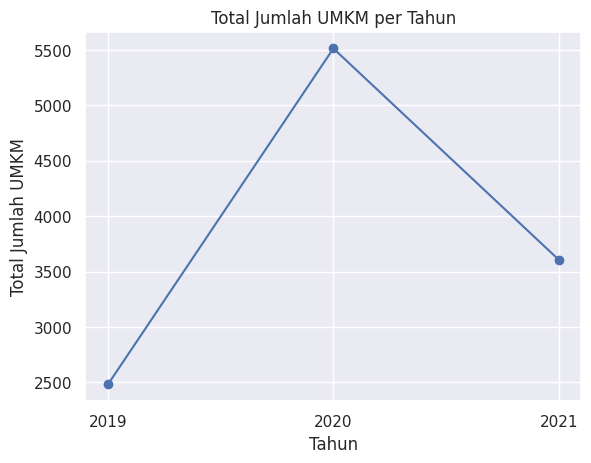

In [ ]:
total_ukm_per_tahun = df.groupby('tahun')['jumlah_umkm'].sum().reset_index()

# Membuat line chart
plt.plot(total_ukm_per_tahun['tahun'], total_ukm_per_tahun['jumlah_umkm'], marker='o')

# Menambahkan judul dan label sumbu
plt.title('Total Jumlah UMKM per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Jumlah UMKM')

# Menentukan label sumbu x
plt.xticks(total_ukm_per_tahun['tahun'])

# Menampilkan line chart
plt.show()

Grafik menunjukkan bahwa adanya perkembangan jumlah umkm, tetapi secara detail bahwa terdapat lonjakan pada tahun 2020 kemudian pada 2021 mengalami penurunan.

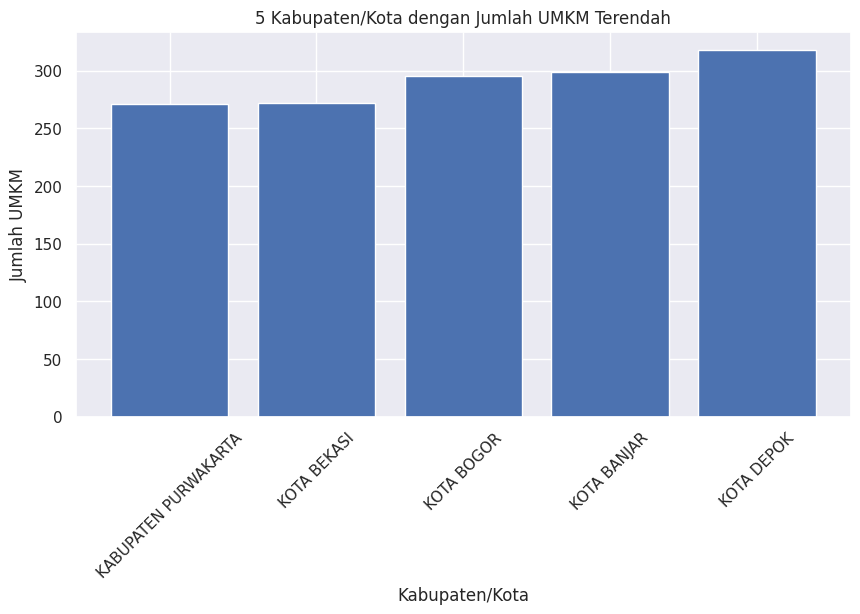

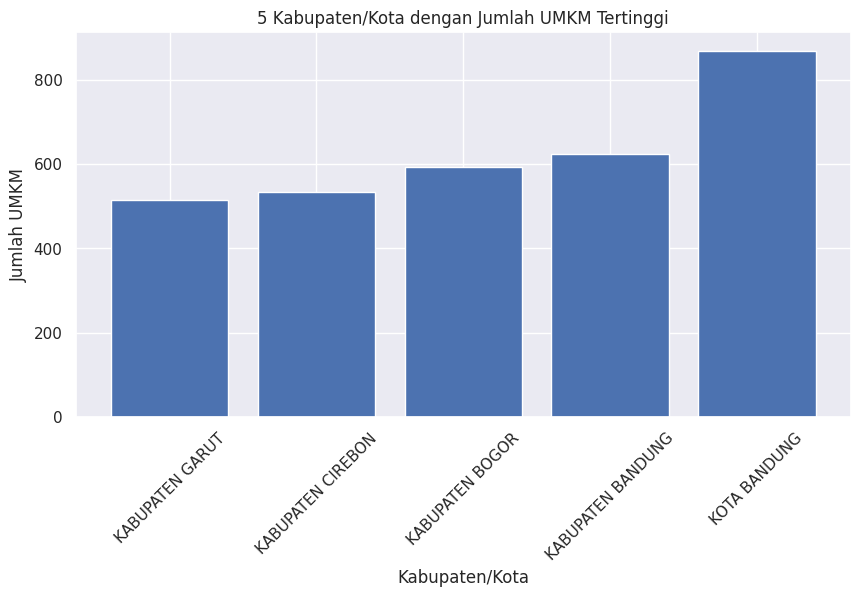

In [ ]:
# Kelompokkan data berdasarkan nama kabupaten/kota dan hitung jumlah UMKM
total_ukm_per_kota = df.groupby('nama_kabupaten_kota')['jumlah_umkm'].sum().reset_index()

# Urutkan DataFrame berdasarkan jumlah UMKM secara menurun
total_ukm_per_kota_sorted = total_ukm_per_kota.sort_values(by='jumlah_umkm')

# Ambil 5 data terendah dan 5 data tertinggi
lowest_5 = total_ukm_per_kota_sorted.head(5)
highest_5 = total_ukm_per_kota_sorted.tail(5)

# Membuat diagram batang untuk 5 kabupaten/kota dengan jumlah UMKM terendah
plt.figure(figsize=(10, 5))  # Mengatur ukuran gambar
plt.bar(lowest_5['nama_kabupaten_kota'], lowest_5['jumlah_umkm'])

# Menambahkan judul dan label sumbu
plt.title('5 Kabupaten/Kota dengan Jumlah UMKM Terendah')
plt.xlabel('Kabupaten/Kota')
plt.ylabel('Jumlah UMKM')

# Menampilkan diagram batang
plt.xticks(rotation=45)  # Rotasi label sumbu x agar legible
plt.show()

# Membuat diagram batang untuk 5 kabupaten/kota dengan jumlah UMKM tertinggi
plt.figure(figsize=(10, 5))  # Mengatur ukuran gambar
plt.bar(highest_5['nama_kabupaten_kota'], highest_5['jumlah_umkm'])

# Menambahkan judul dan label sumbu
plt.title('5 Kabupaten/Kota dengan Jumlah UMKM Tertinggi')
plt.xlabel('Kabupaten/Kota')
plt.ylabel('Jumlah UMKM')

# Menampilkan diagram batang
plt.xticks(rotation=45)  # Rotasi label sumbu x agar legible
plt.show()


Grafik menunjukkan bahwa 5 kota yang tertinggi umkmnya dan 5 terendah umkmnya

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Membuat model regresi linear
model = LinearRegression()

# Mengubah kolom 'tahun' menjadi array numpy dan menyesuaikan bentuknya agar sesuai dengan input model
X = total_ukm_per_tahun['tahun'].values.reshape(-1, 1)

# Variabel target adalah jumlah UMKM
y = total_ukm_per_tahun['jumlah_umkm'].values

# Melatih model dengan data historis
model.fit(X, y)

# Membuat prediksi untuk tahun-tahun berikutnya
tahun_prediksi = np.array([2023, 2024]).reshape(-1, 1)
prediksi_umkm = model.predict(tahun_prediksi)

# Menampilkan prediksi
for tahun, prediksi in zip(tahun_prediksi.flatten(), prediksi_umkm):
    print(f"Prediksi jumlah UMKM untuk tahun {tahun}: {prediksi:.2f}")


Prediksi jumlah UMKM untuk tahun 2023: 5554.50
Prediksi jumlah UMKM untuk tahun 2024: 6117.00


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Melakukan prediksi pada data latih
prediksi_train = model.predict(X)

# Menghitung MAE
mae = mean_absolute_error(y, prediksi_train)
print("Mean Absolute Error (MAE):", mae)

# Menghitung MSE
mse = mean_squared_error(y, prediksi_train)
print("Mean Squared Error (MSE):", mse)

Mean Absolute Error (MAE): 1098.0
Mean Squared Error (MSE): 1356304.5


Performa modelnya masih jelek sehingga perlu dilakukan tuning ulang pada model dan memeriksa model apakah sudah tepat dengan dataset.